[[0.982393]] 1000.0 k
[[0.99963  0.999668 0.999274 0.999493 0.999464 0.999527]] 1000.0 k
[[0.995885 0.995942]] 1000.0 k


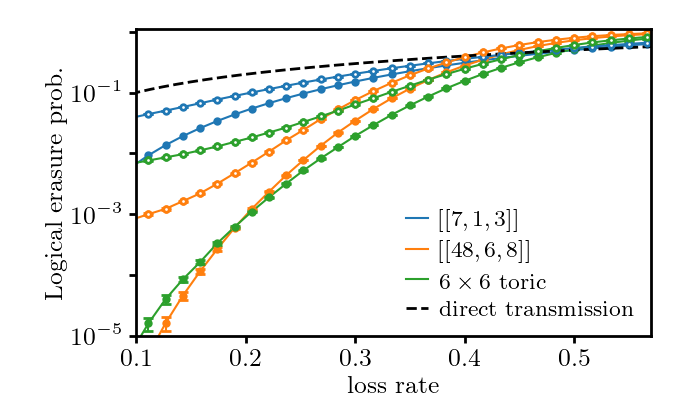

In [57]:
# import
import phd_plot_style
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os

# load style file
import matplotlib.font_manager
import matplotlib as mpl
import seaborn as sns
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
pub_fig_style = phd_plot_style.phd_revtex_plots()

# magic commands
%matplotlib inline
%config InlineBackend.print_figure_kwargs
%config InlineBackend.print_figure_kwargs={'bbox_inches':None, 'dpi': 200}


# Colors
cBlues = sns.color_palette("Blues_r", n_colors=9)#[::3]
cOranges = sns.color_palette("Oranges_r", n_colors=7)#[::3]#[1:-1]
cGreens = sns.color_palette("Greens_r", n_colors=7)#[::3]#[1:-1]
cPurples = sns.color_palette("Purples_r", n_colors=7)#[::3]#[1:-1]
cGreys = sns.color_palette("PuRd_r", n_colors=7)#[::3]#[1:-1]
color_zip = [cPurples, cBlues, cOranges, cGreens, cGreys]

# define dimensions
fig_width  = pub_fig_style.revtex_sizes_active["page.columnwidth"] * pub_fig_style.tex_pt_to_inch
fig_height = pub_fig_style._get_revtex_rc()["figure.figsize"][1]

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Fig 2:
def file_reader(fname_in,repeat,extra=""):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d" % (i_rep) + extra + ".npz"

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0
    
def file_reader_ldpc(fname_in,Nq,repeat,even_odd,extra=""):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d" % (i_rep) + extra + ".npz"

        if os.path.exists(fname):
            npz_file = np.load(fname)
            if even_odd == "odd":
                succ_prob_word, succ_prob, p_list, Nrep = npz_file['succ_prob_word_X'], npz_file['succ_prob_X'],  npz_file['p_list'], npz_file['Nrep']
            else:
                succ_prob_word, succ_prob, p_list, Nrep = npz_file['succ_prob_word_Z'], npz_file['succ_prob_Z'],  npz_file['p_list'], npz_file['Nrep']

            if first :
                first = False
                succ_prob_avg = np.zeros((len(p_list),Nq))
                succ_prob_word_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            succ_prob_word_avg += succ_prob_word*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, succ_prob_word_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0,0

repeat = 300
Nl = 1
#p_r_list = [0,0.1]
p_r_list = [0]
L = 6
#Si = 7 #denote starting index in the data list for plotting
Si = 6

markersize_value = 4
capsize_val = 1.8

f2 = "data_fig2/7q/" + "odd_p_%.2f_Nl_%d" % (0.1,Nl)
succ_prob_odd_1, p_list_1, Ntot = file_reader(f2,1) 
succ_prob_odd_2, p_list_2, Ntot = file_reader(f2,1,"_2") 
p_list = np.concatenate((p_list_1,p_list_2))
### plot part, adjust figure format:
    
fig = plt.figure(figsize = (fig_width, fig_height))
with mpl.rc_context(pub_fig_style._get_revtex_rc()):
    f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
    plt.plot(p_list[Si:],(1-f(1-p_list))[Si:],'-', color="C0", label=r"$[[7,1,3]]$")
    plt.plot(p_list[Si:],(1-f(1-p_list))[Si:],'.',color="C0",markersize=markersize_value)
    
    marker_list = [".","v"]
    for i_p,p_r in enumerate(p_r_list):
        f2 = "data_fig2/48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
        # succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
        succ_prob_odd_1, _, p_list_1, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
        succ_prob_odd_2, _, p_list_2, Ntot = file_reader_ldpc(f2,6,repeat,"odd","_2") 
        succ_prob_odd = np.concatenate((succ_prob_odd_1,succ_prob_odd_2))
        p_list = np.concatenate((p_list_1,p_list_2))
        succ_prob_avg = np.mean( succ_prob_odd ,axis=1)    
        p_fail = 1- succ_prob_avg
        plt.plot(p_list, p_fail,'-', color="C1",label=r"$[[48,6,8]]$")
        plt.errorbar(p_list[Si:],p_fail[Si:], np.sqrt(p_fail*(1-p_fail)/Ntot)[Si:], marker=".",markersize=markersize_value,linestyle="none",capsize= capsize_val,color="C1")


        f2 = "data_toric/" +  "odd_L_%d_p_%.2f_Nl_%d" % (L,p_r,Nl)
        # succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,2,repeat,"odd") 
        succ_prob_odd_1, _, p_list_1, Ntot = file_reader_ldpc(f2,2,repeat,"odd") 
        succ_prob_odd_2, _, p_list_2, Ntot = file_reader_ldpc(f2,2,repeat,"odd","_2") 
        succ_prob_odd = np.concatenate((succ_prob_odd_1,succ_prob_odd_2))
        p_list = np.concatenate((p_list_1,p_list_2))
        succ_prob_avg = np.mean( succ_prob_odd ,axis=1)    
        p_fail = 1- succ_prob_avg
        plt.plot(p_list, p_fail,'-', color="C2",label=r"$6\times6$ toric")
        # plt.plot(p_list[Si:],(1-np.mean(succ_prob_odd,axis=1))[Si:],'-', color="C2",label=r"$6\times6$ toric")
        # p_fail = (1-np.mean(succ_prob_odd,axis=1))[Si:]
        plt.errorbar(p_list[Si:],p_fail[Si:], np.sqrt(p_fail*(1-p_fail)/Ntot)[Si:], marker=".",markersize=markersize_value,linestyle="none",capsize= capsize_val,color="C2")

    ### p_r = 0 part:
    # f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
    # plt.plot(p_list[Si:],(1-f(1-p_list))[Si:],'.',color="C0",markersize=markersize_value)
    
#     marker_list = [".","v"]
#     for i_p,p_r in enumerate(p_r_list):
#         f2 = "data_fig2/48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
#         succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
#         plt.plot(p_list[Si:],(1-np.mean(succ_prob_odd,axis=1))[Si:],'.', color="C1")
    
#         f2 = "data_toric/" +  "odd_L_%d_p_%.2f_Nl_%d" % (L,p_r,Nl)
#         succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,2,repeat,"odd") 
#         plt.plot(p_list[Si:],(1-np.mean(succ_prob_odd,axis=1))[Si:],'.', color="C2")
        
    ### p_r = 0 errorbar:
    #f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
    #plt.errorbar(p_list[Si:],(1-f(1-p_list))[Si:],yerr = ,color="C0")
    
#     marker_list = [".","v"]
#     for i_p,p_r in enumerate(p_r_list):
#         f2 = "data_fig2/48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
#         succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd")
#         p_fail = (1-np.mean(succ_prob_odd,axis=1))[Si:]
#         plt.errorbar(p_list[Si:],p_fail,yerr = np.sqrt(p_fail*(1-p_fail)/Ntot), marker=".",markersize=markersize_value,linestyle="none",capsize= capsize_val,color="C1")
    
#         f2 = "data_toric/" +  "odd_L_%d_p_%.2f_Nl_%d" % (L,p_r,Nl)
#         succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,2,repeat,"odd")
#         p_fail = (1-np.mean(succ_prob_odd,axis=1))[Si:]
        # plt.errorbar(p_list[Si:],p_fail,yerr = np.sqrt(p_fail*(1-p_fail)/Ntot), marker=".",markersize=markersize_value,linestyle="none",capsize= capsize_val,color="C2")
    
    ### p_r = 0.1 part:
    #plt.figure(1,figsize=(6,4))
    
    repeat = 100
    p_r= 0.1
    Nl = 1
    f1 = "data_fig2/7q/" + "even_Nl_%d" % (Nl)
    succ_prob_even, p_list_even, Ntot_even = file_reader(f1,100) 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]
    print(succ_prob_repeater,Ntot_even/1e3, "k")

    f2 = "data_fig2/7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd_1, p_list_1, Ntot = file_reader(f2,repeat) 
    succ_prob_odd_2, p_list_2, Ntot = file_reader(f2,repeat,"_2") 
    succ_prob_odd = np.concatenate((succ_prob_odd_1,succ_prob_odd_2))
    p_list = np.concatenate((p_list_1,p_list_2))
    # succ_prob_avg = succ_prob_odd*succ_prob_repeater
    succ_prob_avg = succ_prob_odd*succ_prob_repeater
    p_fail = 1- np.reshape(succ_prob_avg,(len(p_list),))
    plt.plot(p_list,p_fail,"-",color="C0")
    plt.errorbar(p_list,p_fail, np.sqrt(p_fail*(1-p_fail)/Ntot), marker=".",markersize=markersize_value,markerfacecolor='white',linestyle="none",capsize= capsize_val, color="C0")


    p_r_list = [0.1]
    repeat = 300
    marker_list = [".","v"]
    for i_p,p_r in enumerate(p_r_list):
        f2 = "data_fig2/48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
        succ_prob_odd_1, _, p_list_1, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
        succ_prob_odd_2, _, p_list_2, Ntot = file_reader_ldpc(f2,6,repeat,"odd","_2") 
        succ_prob_odd = np.concatenate((succ_prob_odd_1,succ_prob_odd_2))
        p_list = np.concatenate((p_list_1,p_list_2))
        f1 = "data_fig2/48q/" + "even_Nl_%d" % (Nl)
        succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
        succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
        print(succ_prob_repeater,Ntot_even/1e3, "k")
        succ_prob_avg = np.mean( succ_prob_odd*succ_prob_repeater ,axis=1)    
        
        # succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd")
        p_fail = 1- succ_prob_avg
        plt.plot(p_list, p_fail,marker=marker_list[i_p], color="C1",markerfacecolor='none',markersize=markersize_value)
        plt.errorbar(p_list[Si:],p_fail[Si:],np.sqrt(p_fail*(1-p_fail)/Ntot)[Si:],  marker=".",markersize=markersize_value,markerfacecolor='white',linestyle="none",capsize= capsize_val,color="C1")

        f2 = "data_toric/" +  "odd_L_%d_p_%.2f_Nl_%d" % (L,p_r,Nl)
        # succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,2,repeat,"odd") 
        succ_prob_odd_1, _, p_list_1, Ntot = file_reader_ldpc(f2,2,repeat,"odd") 
        succ_prob_odd_2, _, p_list_2, Ntot = file_reader_ldpc(f2,2,repeat,"odd","_2") 
        succ_prob_odd = np.concatenate((succ_prob_odd_1,succ_prob_odd_2))
        p_list = np.concatenate((p_list_1,p_list_2))
        f1 = "data_toric/" + "even_L_%d_Nl_%d" % (L,Nl)
        succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,2,repeat,"even") 
        succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
        print(succ_prob_repeater,Ntot_even/1e3, "k")
        succ_prob_avg = np.mean( succ_prob_odd*succ_prob_repeater ,axis=1)    
        p_fail = 1- succ_prob_avg
        plt.plot(p_list,p_fail,marker=marker_list[i_p], color="C2",markerfacecolor='none',markersize=markersize_value)
        # p_fail = (1-np.mean(succ_prob_odd,axis=1))[Si:]
        plt.errorbar(p_list[Si:],p_fail[Si:], np.sqrt(p_fail*(1-p_fail)/Ntot)[Si:],  marker=".",markersize=markersize_value,markerfacecolor='white',linestyle="none",capsize= capsize_val,color="C2")


    ### p_r = 0.1  errorbar
#     f2 = "data_fig2/7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
#     succ_prob_odd, p_list, Ntot = file_reader(f2,repeat)
    # p_fail = 1-succ_prob_avg
    # # errorbar(x,y,y_err,marker=".",markersize=8,markerfacecolor='white',linestyle="none",capsize= capsize_val, color="C%d" % (i_L), label="sth")
    # plt.errorbar(p_list,p_fail,yerr = np.sqrt(p_fail*(1-p_fail)/Ntot), marker=".",markersize=markersize_value,markerfacecolor='white',linestyle="none",capsize= capsize_val, color="C0")
    
#     p_r_list = [0.1]
#     repeat = 300
#     marker_list = [".","v"]
#     for i_p,p_r in enumerate(p_r_list):
#         f2 = "data_fig2/48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
#         succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
#         p_fail = (1-np.mean(succ_prob_odd,axis=1))[Si:]
#         plt.errorbar(p_list[Si:],p_fail,yerr = np.sqrt(p_fail*(1-p_fail)/Ntot),  marker=".",markersize=markersize_value,markerfacecolor='white',linestyle="none",capsize= capsize_val,color="C1")
    
#         f2 = "data_toric/" +  "odd_L_%d_p_%.2f_Nl_%d" % (L,p_r,Nl)
#         succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,2,repeat,"odd")
#         p_fail = (1-np.mean(succ_prob_odd,axis=1))[Si:]
#         plt.errorbar(p_list[Si:],p_fail,yerr = np.sqrt(p_fail*(1-p_fail)/Ntot),  marker=".",markersize=markersize_value,markerfacecolor='white',linestyle="none",capsize= capsize_val,color="C2")
    
    x_list = np.linspace(0.,0.6,1000)
    plt.plot(x_list,x_list,"k--",linewidth=1,label='direct transmission')
        
    plt.xlabel("loss rate")
    plt.ylabel("Logical erasure prob.")
    plt.yscale("log")
    
    plt.ylim(1e-5,1.1e0)
    plt.xlim(0.1,0.57)

    xtick = np.arange(0.1,0.51,0.1)
    # xtick_labels = ['0.1','','0.2','','0.3','','0.4','','0.5']
    plt.xticks(xtick)
    ytick = [1e-5,1e-4,1e-3,1e-2,1e-1,1e0]
    ytick_labels = [r'$10^{-5}$','',r'$10^{-3}$','',r'$10^{-1}$','']
    plt.yticks(ytick, ytick_labels)
    #plt.legend(frameon=False, fontsize='large', ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.legend(frameon=False, ncol=1, loc="lower right")
    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.gcf().subplots_adjust(left=0.2)
    plt.savefig("Fig2_v6.pdf")
    plt.show()